In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("kc_house_data1.csv")
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_above  \
0  7129300520  20141013T000000         3       1.00         1180        1180   
1  6414100192  20141209T000000         3       2.25         2570        2170   
2  5631500400  20150225T000000         2       1.00          770         770   
3  2487200875  20141209T000000         4       3.00         1960        1050   
4  1954400510  20150218T000000         3       2.00         1680        1680   

   grade     price  
0      7  221900.0  
1      7  538000.0  
2      6  180000.0  
3      7  604000.0  
4      8  510000.0

In [3]:
data.shape

(21613, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21545 entries, 0 to 21612
Data columns (total 8 columns):
id             21545 non-null int64
date           21545 non-null object
bedrooms       21545 non-null int64
bathrooms      21545 non-null float64
sqft_living    21545 non-null int64
sqft_above     21545 non-null int64
grade          21545 non-null int64
price          21545 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [4]:
data.isnull().sum()

id             0
date           0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_above     0
grade          0
price          0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

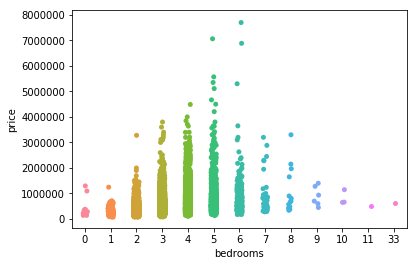

In [6]:
sns.stripplot(x='bedrooms', y='price',data=data)

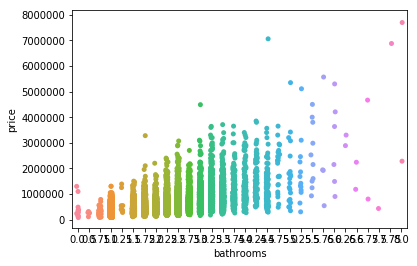

In [7]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

In [8]:
#We can remove outliers from data like house with bedrooms > 10 and bathrooms>5.
data=data[data['bedrooms'] < 10]
data=data[data['bathrooms']<5]

In [9]:
data[data['bathrooms'] > 5]

Empty DataFrame
Columns: [id, date, bedrooms, bathrooms, sqft_living, sqft_above, grade, price]
Index: []

In [11]:
X = data[['bedrooms','bathrooms','sqft_living','sqft_above','grade']]

In [12]:
y = data['price']

In [14]:
#X

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,
                                               random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_pred = reg.predict(X_test)

In [18]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-3.61543904e+04 -2.99638388e+04  2.59671088e+02 -8.03733606e+01
  1.09426697e+05]
Intercept: 
 -514151.40201258205


In [19]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))

57167845037.51588


In [20]:
reg.score(X_test,y_test)

0.5440971003786763